In [11]:
import os
os.environ["OMP_NUM_THREADS"] = '1'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [12]:
BRdf = pd.read_csv('baskin_robbins_icecream.csv')
BRdf.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),Category
0,Bananas Foster,160,8.0,0.2,20,16,2.0,std
1,Baseball Nut,160,9.0,0.2,19,13,3.0,std
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,std
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,std
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,light


#### Q1

In [14]:
X = BRdf.drop(['Flavour', 'Category'], axis=1)

In [15]:
X.head()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,160,8.0,0.2,20,16,2.0
1,160,9.0,0.2,19,13,3.0
2,170,9.0,0.3,21,15,3.0
3,120,4.0,0.1,17,16,3.0
4,130,2.0,0.1,26,20,2.0


In [16]:
X.tail()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
65,200,10.0,0.4,24,21,4.0
66,120,0.5,0.0,27,20,0.1
67,80,1.5,0.0,16,12,1.0
68,160,8.0,0.2,20,16,2.0
69,260,60.0,0.4,25,18,5.0


#### Q2

In [18]:
scaler = MinMaxScaler()
XS = scaler.fit_transform(X)

In [19]:
XS[1:5]

array([[0.34615385, 0.15      , 0.4       , 0.24      , 0.375     ,
        0.375     ],
       [0.38461538, 0.15      , 0.6       , 0.32      , 0.45833333,
        0.375     ],
       [0.19230769, 0.06666667, 0.2       , 0.16      , 0.5       ,
        0.375     ],
       [0.23076923, 0.03333333, 0.2       , 0.52      , 0.66666667,
        0.25      ]])

In [20]:
import warnings
warnings.filterwarnings('ignore')

#### Q3 & 4

In [30]:
wss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init=10, random_state = 99)
    kmeans.fit(XS)
    wss.append(kmeans.inertia_)

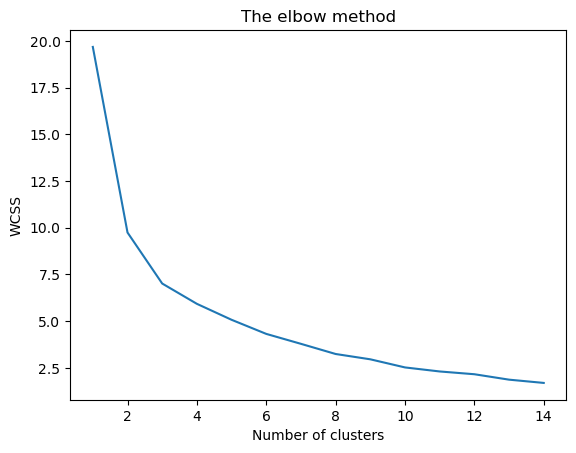

In [32]:
plt.plot(range(1, 15), wss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [38]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, random_state = 99)
Y = kmeans.fit_predict(XS)
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 2, 1, 2, 1, 1, 1, 0, 2, 1,
       1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 0, 1, 1, 2,
       1, 1, 1, 0])

In [41]:
score = silhouette_score(XS, kmeans.labels_, metric='euclidean')
score

0.3583141783564117

##### WSS measures the variance within clusters and typically decreases as the number of clusters increases. The "elbow" point—where the decrease rate noticeably slows—is viewed as the optimal number of clusters. Here, the optimal cluster number is 3.
##### With a silhouette score of 0.358, the clustering shows moderate separation, but there may be overlap between clusters. This score suggests that the clusters are not perfectly distinct, and there could be some room for improvement in clustering quality, either by adjusting the cluster number or by trying a different clustering method.

#### Q5

Text(0.5, 1.0, 'The dataset post clustering')

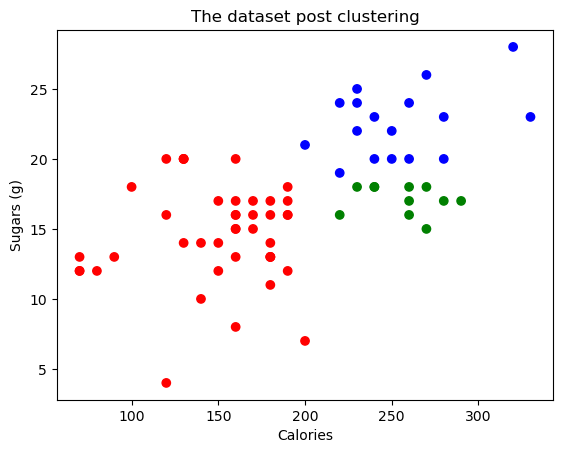

In [100]:
# Plotting the clusters
color2=np.array(['green','red','blue'])
plt.scatter(x=X.Calories,y=X['Sugars (g)'],c=color2[kmeans.labels_])
plt.xlabel('Calories')
plt.ylabel('Sugars (g)')
plt.title("The dataset post clustering")

##### The scatter plot illustrates the clustering of ice cream items based on calories and sugar content. Three clusters emerge: a red cluster representing low-calorie, low-sugar items (around 80-200 calories and 5-20g sugar), a green cluster indicating moderate-calorie and moderate-sugar items (200-300 calories and 10-20g sugar), and a blue cluster for high-calorie, high-sugar items (250-325 calories and 15-25g sugar). This segmentation can guide dietary recommendations, identifying items as "Low-Calorie," "Balanced," or "Indulgent" based on their nutritional profiles.

#### Q6

In [109]:
C1 = X.iloc[Y == 0, :]
C2 = X.iloc[Y == 1, :]
C3 = X.iloc[Y == 2, :]

#### Q7

In [122]:
C1.describe()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,256.363636,20.545455,0.436364,22.818182,17.090909,5.454545
std,21.574396,13.261702,0.050452,1.887760,1.044466,0.820200
min,220.000000,13.000000,0.400000,20.000000,15.000000,5.000000
25%,240.000000,15.000000,0.400000,21.500000,16.500000,5.000000
50%,260.000000,17.000000,0.400000,23.000000,17.000000,5.000000
75%,270.000000,18.500000,0.500000,24.500000,18.000000,5.500000
max,290.000000,60.000000,0.500000,25.000000,18.000000,7.000000


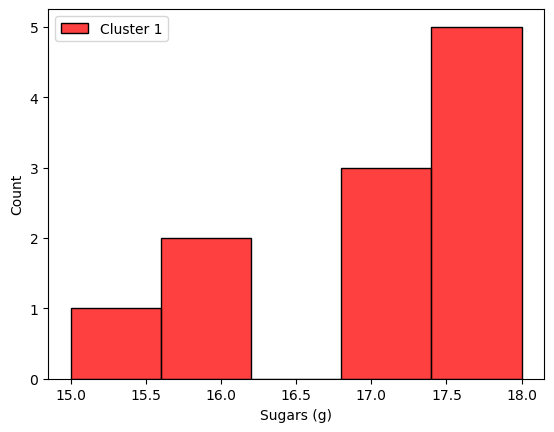

In [153]:
sns.histplot(data=C1, x='Sugars (g)', color='red', label='Cluster 1')
plt.legend()
plt.show()

In [170]:
C1['Sugars (g)'].mean()

17.09090909090909

<Axes: >

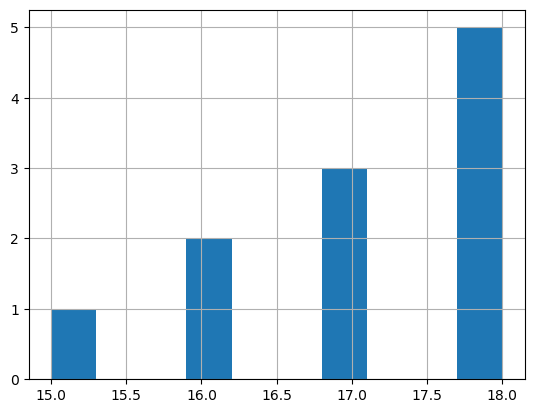

In [173]:
C1['Sugars (g)'].hist()

In [124]:
C2.describe()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,149.761905,6.819048,0.190476,20.238095,14.571429,2.635714
std,36.122292,3.889275,0.118547,4.600157,3.527888,1.347956
min,70.000000,0.000000,0.000000,13.000000,4.000000,0.000000
25%,130.000000,4.250000,0.100000,17.000000,13.000000,2.000000
50%,160.000000,8.000000,0.200000,20.000000,15.000000,3.000000
75%,180.000000,9.750000,0.300000,21.000000,17.000000,3.000000
max,200.000000,12.000000,0.400000,38.000000,20.000000,6.000000


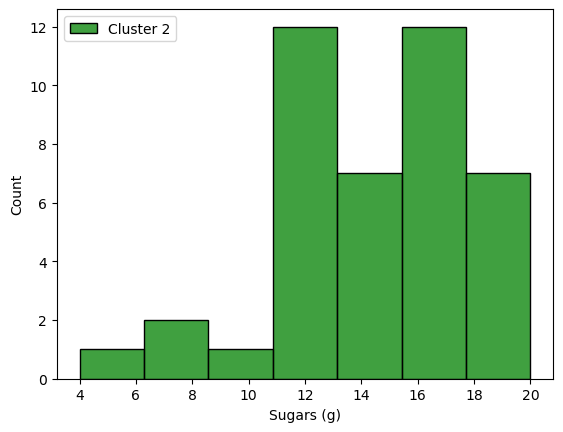

In [149]:
sns.histplot(data=C2, x='Sugars (g)', color='green', label='Cluster 2')
plt.legend()
plt.show()

In [176]:
C2['Sugars (g)'].mean()

14.571428571428571

<Axes: >

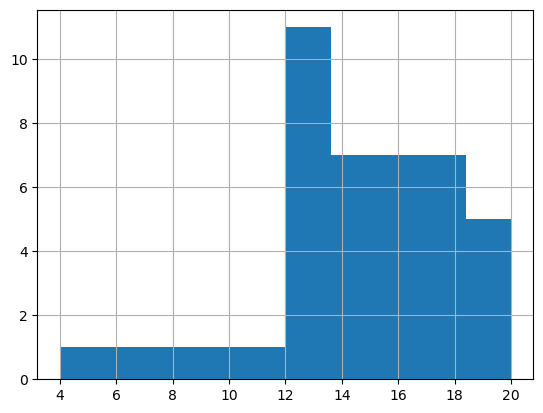

In [180]:
C2['Sugars (g)'].hist()

In [126]:
C3.describe()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,253.529412,13.352941,0.388235,29.529412,22.588235,4.647059
std,34.630401,3.180825,0.060025,2.527787,2.450990,1.057188
min,200.000000,9.000000,0.200000,24.000000,19.000000,4.000000
25%,230.000000,11.000000,0.400000,29.000000,20.000000,4.000000
50%,250.000000,13.000000,0.400000,30.000000,23.000000,4.000000
75%,270.000000,15.000000,0.400000,30.000000,24.000000,5.000000
max,330.000000,21.000000,0.500000,36.000000,28.000000,8.000000


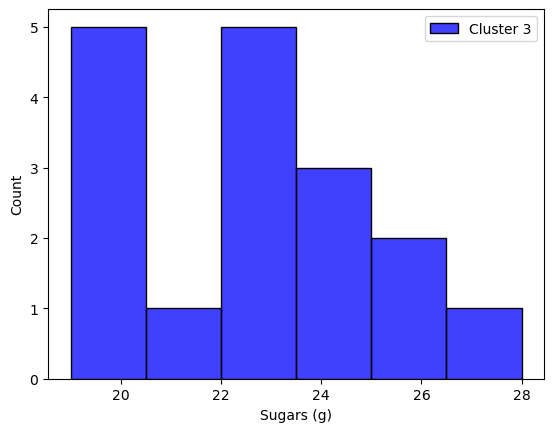

In [151]:
sns.histplot(data=C3, x='Sugars (g)', color='blue', label='Cluster 3')
plt.legend()
plt.show()

In [182]:
C3['Sugars (g)'].mean()

22.58823529411765

<Axes: >

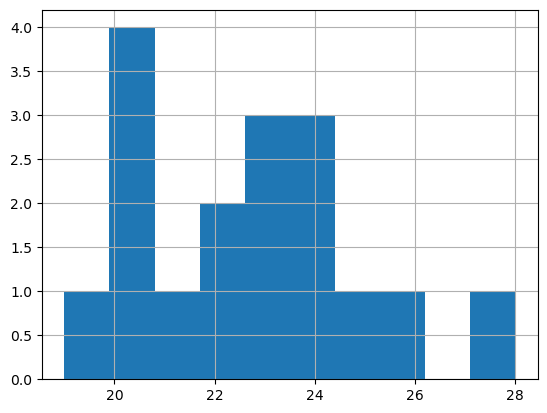

In [184]:
C3['Sugars (g)'].hist()

#### The mean sugar values for each cluster indicate differences in sugar content among the groups:

#### Cluster C1 has a mean sugar content of approximately 17.1 grams, suggesting it represents items with moderate sugar levels. And its histogram shows a gradual increase of sugar consumption. 
#### Cluster C2 has a lower mean sugar content of around 14.6 grams, identifying it as the group with the lowest sugar levels. Its histogram shows more spread out comsumption of sugar.
#### Cluster C3 has the highest mean sugar content at about 22.6 grams, indicating that it contains items with the most sugar. Its histogram shows high counts of comsumption of high amounts of sugar.

#### These distinctions could help in labeling clusters according to sugar levels, such as "Moderate Sugar" for C1, "Low Sugar" for C2, and "High Sugar" for C3.

#### Q8

#### C1 (Moderate Sugar): "Sweet Balance"
#### C2 (Low Sugar): "Light & Fit" 
#### C3 (High Sugar): "Sugar Rush" 